In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv("Lab04_data.csv")
data

,Age,Income,Student,Credit_Rating,Buys_Computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,30---40,high,no,fair,yes
3,>=40,medium,no,fair,yes
4,>=40,low,yes,fair,yes
5,>=40,low,yes,excellent,no
6,30---40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>=40,medium,yes,fair,yes


In [3]:
data.set_index("Age", inplace=True)
data

,Income,Student,Credit_Rating,Buys_Computer
Age,,,,
<=30,high,no,fair,no
<=30,high,no,excellent,no
30---40,high,no,fair,yes
>=40,medium,no,fair,yes
>=40,low,yes,fair,yes
>=40,low,yes,excellent,no
30---40,low,yes,excellent,yes
<=30,medium,no,fair,no
<=30,low,yes,fair,yes


In [4]:

def entropy(col,df,option=2):
    new_df=df.iloc[:,[col,len(df.columns)-1]]
    new_df.columns=('col1','col2')
    names,count=np.unique(new_df.col1,return_counts=True)
    
    entropy_list=list()

    for i in range(0,(len(names))):
            if(option==2):
                dff=new_df[new_df.col1==names[i]]
                entropy_list.append(count[i])
            else:
                dff=new_df
            den=len(dff)
            columns=new_df.col2.unique()
            p1 = dff.col2.eq(columns[0]).sum()/den
            p2 = dff.col2.eq(columns[1]).sum()/den
            P=[p1,p2]
            ent=0
            k=0
            for p in P:
                k=k+1
                if p == 0:
                    p=1
                ent += -p * math.log(p,2)
                if(k==len(P)):
                    entropy_list.append(ent)    
    return entropy_list
    
    
def information_gain(col,df):
    den=len(df)

    info_gain = entropy(col,df,1)[1]
    Split=entropy(col,df,2)
    c=len(Split)/2
    c=int(c)
    
    j=0
    
    for i in range(0,c):
        weight=Split[j]/den
        info_gain= info_gain - weight*Split[j+1]
        j=j+2
    return(info_gain)

In [5]:
print(entropy(0,data))
print(entropy(1,data))
print(entropy(2,data))
print(entropy(3,data))

[4, 1.0, 4, 0.8112781244591328, 6, 0.9182958340544896]
[7, 0.9852281360342516, 7, 0.5916727785823275]
[6, 1.0, 8, 0.8112781244591328]
[5, 0.0, 9, 0.0]


In [6]:
information_gain(0, data)

0.029222565658954647

In [7]:
information_gain(1, data)

0.15183550136234136

In [8]:
information_gain(2, data)

0.04812703040826927

In [9]:
information_gain(3, data)

0.9402859586706309

In [10]:
data.reset_index(inplace=True)
data

,Age,Income,Student,Credit_Rating,Buys_Computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,30---40,high,no,fair,yes
3,>=40,medium,no,fair,yes
4,>=40,low,yes,fair,yes
5,>=40,low,yes,excellent,no
6,30---40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>=40,medium,yes,fair,yes


In [11]:
data.dtypes

Age              object
Income           object
Student          object
Credit_Rating    object
Buys_Computer    object
dtype: object

In [12]:
data = pd.get_dummies(data, columns=["Age", "Income", "Student", "Credit_Rating"])
data

,Buys_Computer,Age_30---40,Age_<=30,Age_>=40,Income_high,Income_low,Income_medium,Student_no,Student_yes,Credit_Rating_excellent,Credit_Rating_fair
0,no,0,1,0,1,0,0,1,0,0,1
1,no,0,1,0,1,0,0,1,0,1,0
2,yes,1,0,0,1,0,0,1,0,0,1
3,yes,0,0,1,0,0,1,1,0,0,1
4,yes,0,0,1,0,1,0,0,1,0,1
5,no,0,0,1,0,1,0,0,1,1,0
6,yes,1,0,0,0,1,0,0,1,1,0
7,no,0,1,0,0,0,1,1,0,0,1
8,yes,0,1,0,0,1,0,0,1,0,1
9,yes,0,0,1,0,0,1,0,1,0,1


In [13]:
data.drop(["Age_>=40", "Income_high", "Student_yes", "Credit_Rating_fair"], axis=1, inplace=True)
data

,Buys_Computer,Age_30---40,Age_<=30,Income_low,Income_medium,Student_no,Credit_Rating_excellent
0,no,0,1,0,0,1,0
1,no,0,1,0,0,1,1
2,yes,1,0,0,0,1,0
3,yes,0,0,0,1,1,0
4,yes,0,0,1,0,0,0
5,no,0,0,1,0,0,1
6,yes,1,0,1,0,0,1
7,no,0,1,0,1,1,0
8,yes,0,1,1,0,0,0
9,yes,0,0,0,1,0,0


In [14]:
data["Buys_Computer"] = data["Buys_Computer"].map(dict(yes=1, no=0))
data

,Buys_Computer,Age_30---40,Age_<=30,Income_low,Income_medium,Student_no,Credit_Rating_excellent
0,0,0,1,0,0,1,0
1,0,0,1,0,0,1,1
2,1,1,0,0,0,1,0
3,1,0,0,0,1,1,0
4,1,0,0,1,0,0,0
5,0,0,0,1,0,0,1
6,1,1,0,1,0,0,1
7,0,0,1,0,1,1,0
8,1,0,1,1,0,0,0
9,1,0,0,0,1,0,0


In [15]:
X = data.drop("Buys_Computer", axis=1)
Y = data["Buys_Computer"]
print(X.shape)
print(Y.shape)

(14, 6)
(14,)


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10, 6)
(4, 6)
(10,)
(4,)


In [17]:
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
model1.score(X_train, Y_train)

1.0

In [19]:
print(model1.get_depth())

4


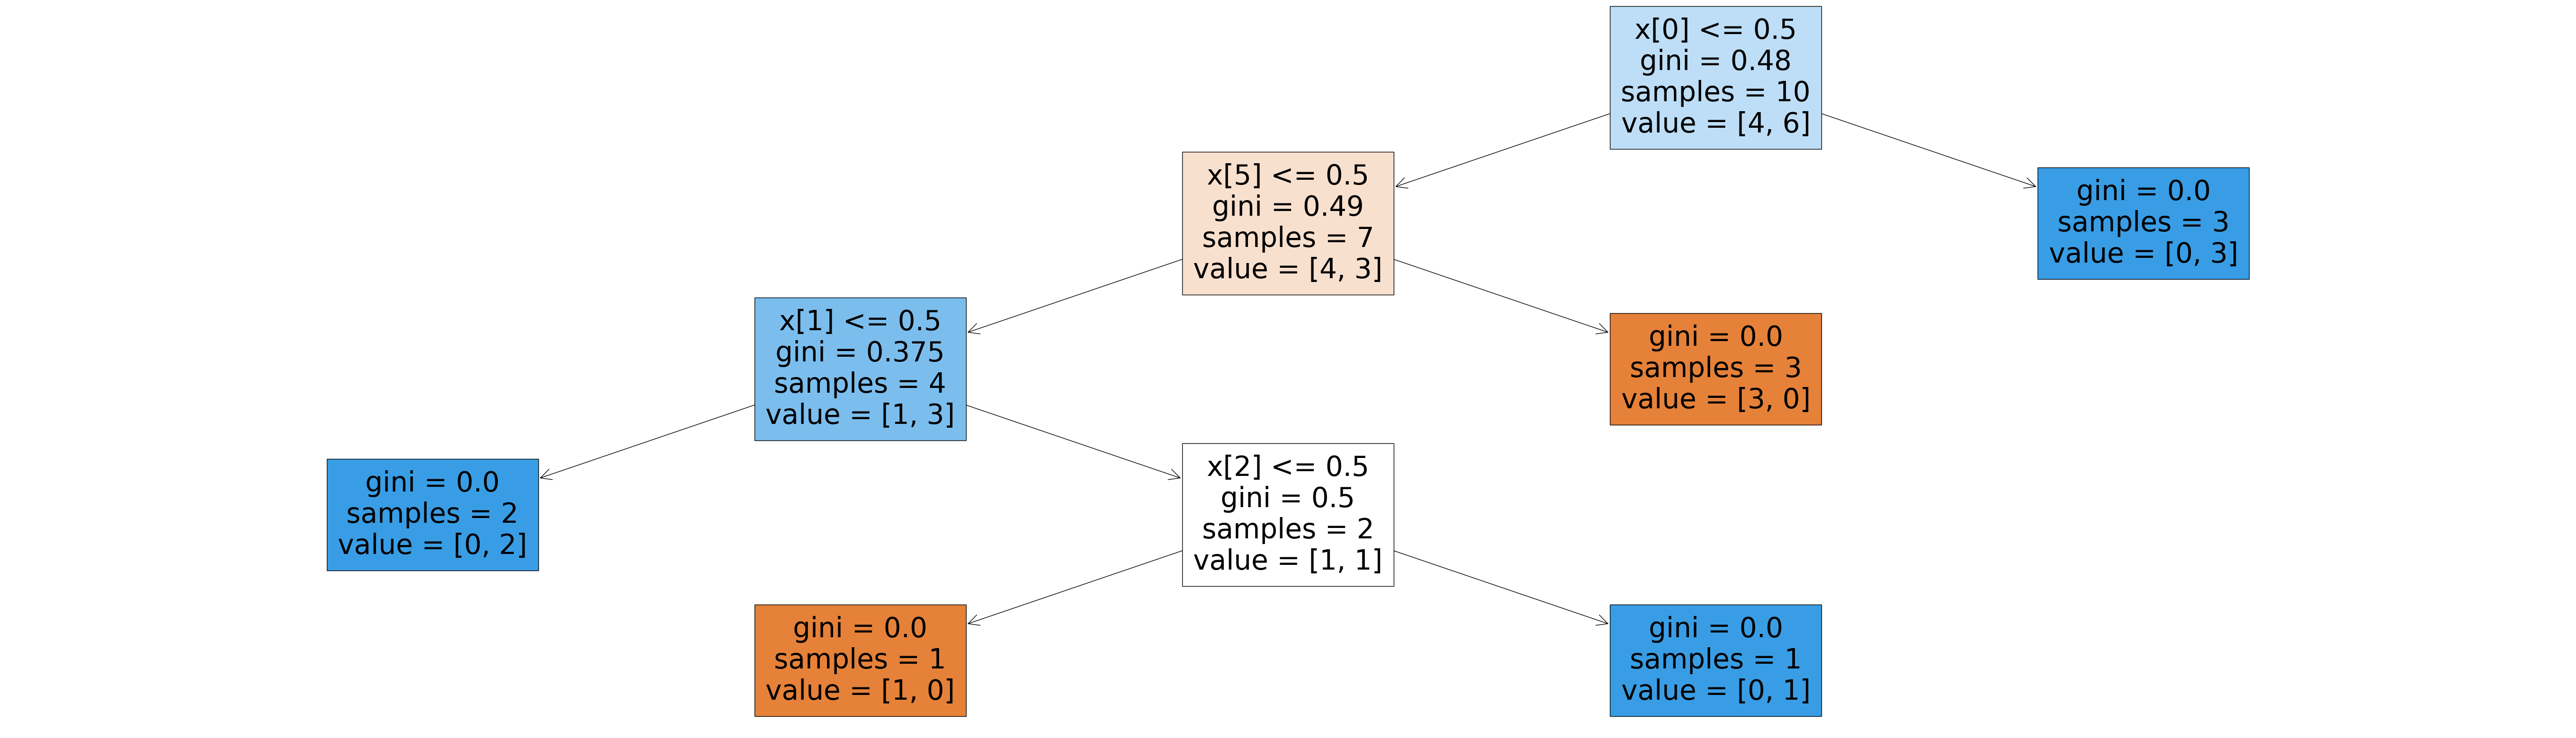

In [20]:
plt.figure(figsize=(70,20))
tree.plot_tree(model1, filled=True)
plt.show()

In [21]:
df = pd.read_csv("Skin_Cancer_Metadata.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [22]:
df.drop(["lesion_id", "image_id"], axis=1, inplace=True)
df

,dx,dx_type,age,sex,localization
0,bkl,histo,80.0,male,scalp
1,bkl,histo,80.0,male,scalp
2,bkl,histo,80.0,male,scalp
3,bkl,histo,80.0,male,scalp
4,bkl,histo,75.0,male,ear
...,...,...,...,...,...
10010,akiec,histo,40.0,male,abdomen
10011,akiec,histo,40.0,male,abdomen
10012,akiec,histo,40.0,male,abdomen
10013,akiec,histo,80.0,male,face


In [23]:
df.rename(columns= {"dx":"Label"}, inplace=True)
df

,Label,dx_type,age,sex,localization
0,bkl,histo,80.0,male,scalp
1,bkl,histo,80.0,male,scalp
2,bkl,histo,80.0,male,scalp
3,bkl,histo,80.0,male,scalp
4,bkl,histo,75.0,male,ear
...,...,...,...,...,...
10010,akiec,histo,40.0,male,abdomen
10011,akiec,histo,40.0,male,abdomen
10012,akiec,histo,40.0,male,abdomen
10013,akiec,histo,80.0,male,face


In [24]:
df.dtypes

Label            object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

In [25]:
df.isna().sum()

Label            0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [26]:
df.dropna(inplace=True)
df.shape

(9958, 5)

In [27]:
df["Label"].value_counts()

nv       6660
mel      1111
bkl      1089
bcc       514
akiec     327
vasc      142
df        115
Name: Label, dtype: int64

In [28]:
df["Label"] = df["Label"].map(dict(nv=1, mel=2, bkl=3, bcc=4, akiec=5, vasc=6, df=7))
df

,Label,dx_type,age,sex,localization
0,3,histo,80.0,male,scalp
1,3,histo,80.0,male,scalp
2,3,histo,80.0,male,scalp
3,3,histo,80.0,male,scalp
4,3,histo,75.0,male,ear
...,...,...,...,...,...
10010,5,histo,40.0,male,abdomen
10011,5,histo,40.0,male,abdomen
10012,5,histo,40.0,male,abdomen
10013,5,histo,80.0,male,face


In [29]:
df["Label"].value_counts()

1    6660
2    1111
3    1089
4     514
5     327
6     142
7     115
Name: Label, dtype: int64

In [30]:
df["dx_type"].value_counts()

histo        5332
follow_up    3704
consensus     853
confocal       69
Name: dx_type, dtype: int64

In [31]:
df["sex"].value_counts()

male       5400
female     4548
unknown      10
Name: sex, dtype: int64

In [32]:
list = ["unknown"]
df = df[df["sex"].isin(list)==False]
df

,Label,dx_type,age,sex,localization
0,3,histo,80.0,male,scalp
1,3,histo,80.0,male,scalp
2,3,histo,80.0,male,scalp
3,3,histo,80.0,male,scalp
4,3,histo,75.0,male,ear
...,...,...,...,...,...
10010,5,histo,40.0,male,abdomen
10011,5,histo,40.0,male,abdomen
10012,5,histo,40.0,male,abdomen
10013,5,histo,80.0,male,face


In [33]:
df["sex"].value_counts()

male      5400
female    4548
Name: sex, dtype: int64

In [34]:
df["localization"].value_counts()

back               2190
lower extremity    2077
trunk              1400
upper extremity    1116
abdomen            1019
face                743
chest               405
foot                314
unknown             187
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [35]:
df = pd.get_dummies(df, columns=["dx_type", "sex", "localization"])
df

,Label,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,localization_abdomen,localization_acral,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,3,80.0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,80.0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,80.0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,80.0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,75.0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,5,40.0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
10011,5,40.0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
10012,5,40.0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
10013,5,80.0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:
df.drop(["dx_type_histo", "sex_female", "localization_upper extremity"], axis=1, inplace=True)
df

,Label,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,sex_male,localization_abdomen,localization_acral,localization_back,localization_chest,localization_ear,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown
0,3,80.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,80.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,80.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,80.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,75.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,5,40.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10011,5,40.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10012,5,40.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10013,5,80.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [37]:
x = df.drop("Label", axis=1)
y = df["Label"]
print(x.shape)
print(y.shape)

(9948, 19)
(9948,)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6963, 19)
(2985, 19)
(6963,)
(2985,)


In [39]:
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
model2.score(x_train, y_train)

0.7637512566422519

In [41]:
y_pred = model2.predict(x_test)
accuracy_score(y_test, y_pred)

0.7239530988274707

In [42]:
print(confusion_matrix(y_test, y_pred))

[[1866   73   34   10    3    3    1]
 [ 185   96   44   14    5    0    0]
 [  92   57  156   26   10    7    1]
 [  54   27   37   23    5    0    0]
 [  27   15   24   14    5    0    0]
 [  10    3   17    0    0    4    0]
 [  18    1    3    2    0    2   11]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.94      0.88      1990
           2       0.35      0.28      0.31       344
           3       0.50      0.45      0.47       349
           4       0.26      0.16      0.20       146
           5       0.18      0.06      0.09        85
           6       0.25      0.12      0.16        34
           7       0.85      0.30      0.44        37

    accuracy                           0.72      2985
   macro avg       0.46      0.33      0.36      2985
weighted avg       0.68      0.72      0.70      2985



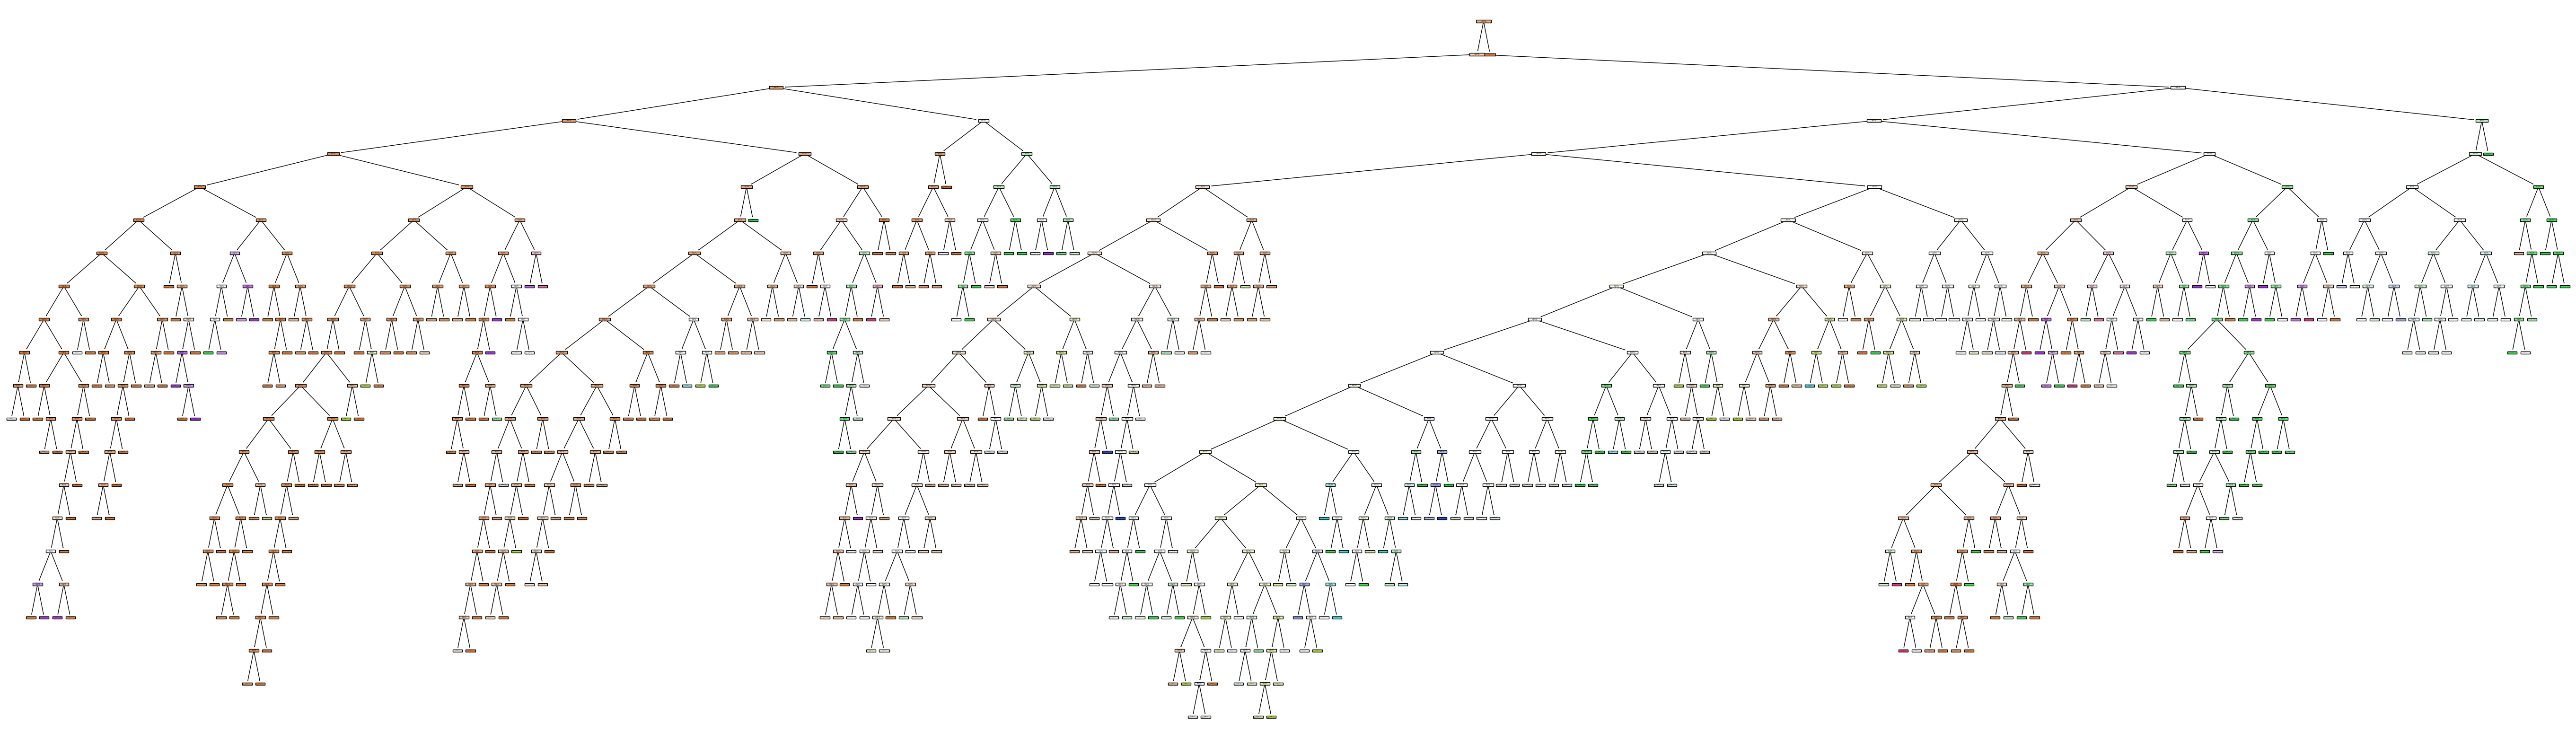

In [44]:
plt.figure(figsize=(70,20))
tree.plot_tree(model2, filled=True)
plt.show()

In [45]:
print(model2.get_depth())

21


In [46]:
model3 = DecisionTreeClassifier(max_depth=5, random_state=42)
model3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [47]:
model3.score(x_train, y_train)

0.7075973000143616

In [48]:
y_pred2 = model3.predict(x_test)
accuracy_score(y_test, y_pred2)

0.699497487437186

In [49]:
print(confusion_matrix(y_test, y_pred2))

[[1824  135   31    0    0    0    0]
 [ 167  145   32    0    0    0    0]
 [  95  135  119    0    0    0    0]
 [  38   78   30    0    0    0    0]
 [  22   37   26    0    0    0    0]
 [  23    5    6    0    0    0    0]
 [  34    3    0    0    0    0    0]]


In [50]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.83      0.92      0.87      1990
           2       0.27      0.42      0.33       344
           3       0.49      0.34      0.40       349
           4       0.00      0.00      0.00       146
           5       0.00      0.00      0.00        85
           6       0.00      0.00      0.00        34
           7       0.00      0.00      0.00        37

    accuracy                           0.70      2985
   macro avg       0.23      0.24      0.23      2985
weighted avg       0.64      0.70      0.66      2985



C:\Users\Trisha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trisha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trisha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


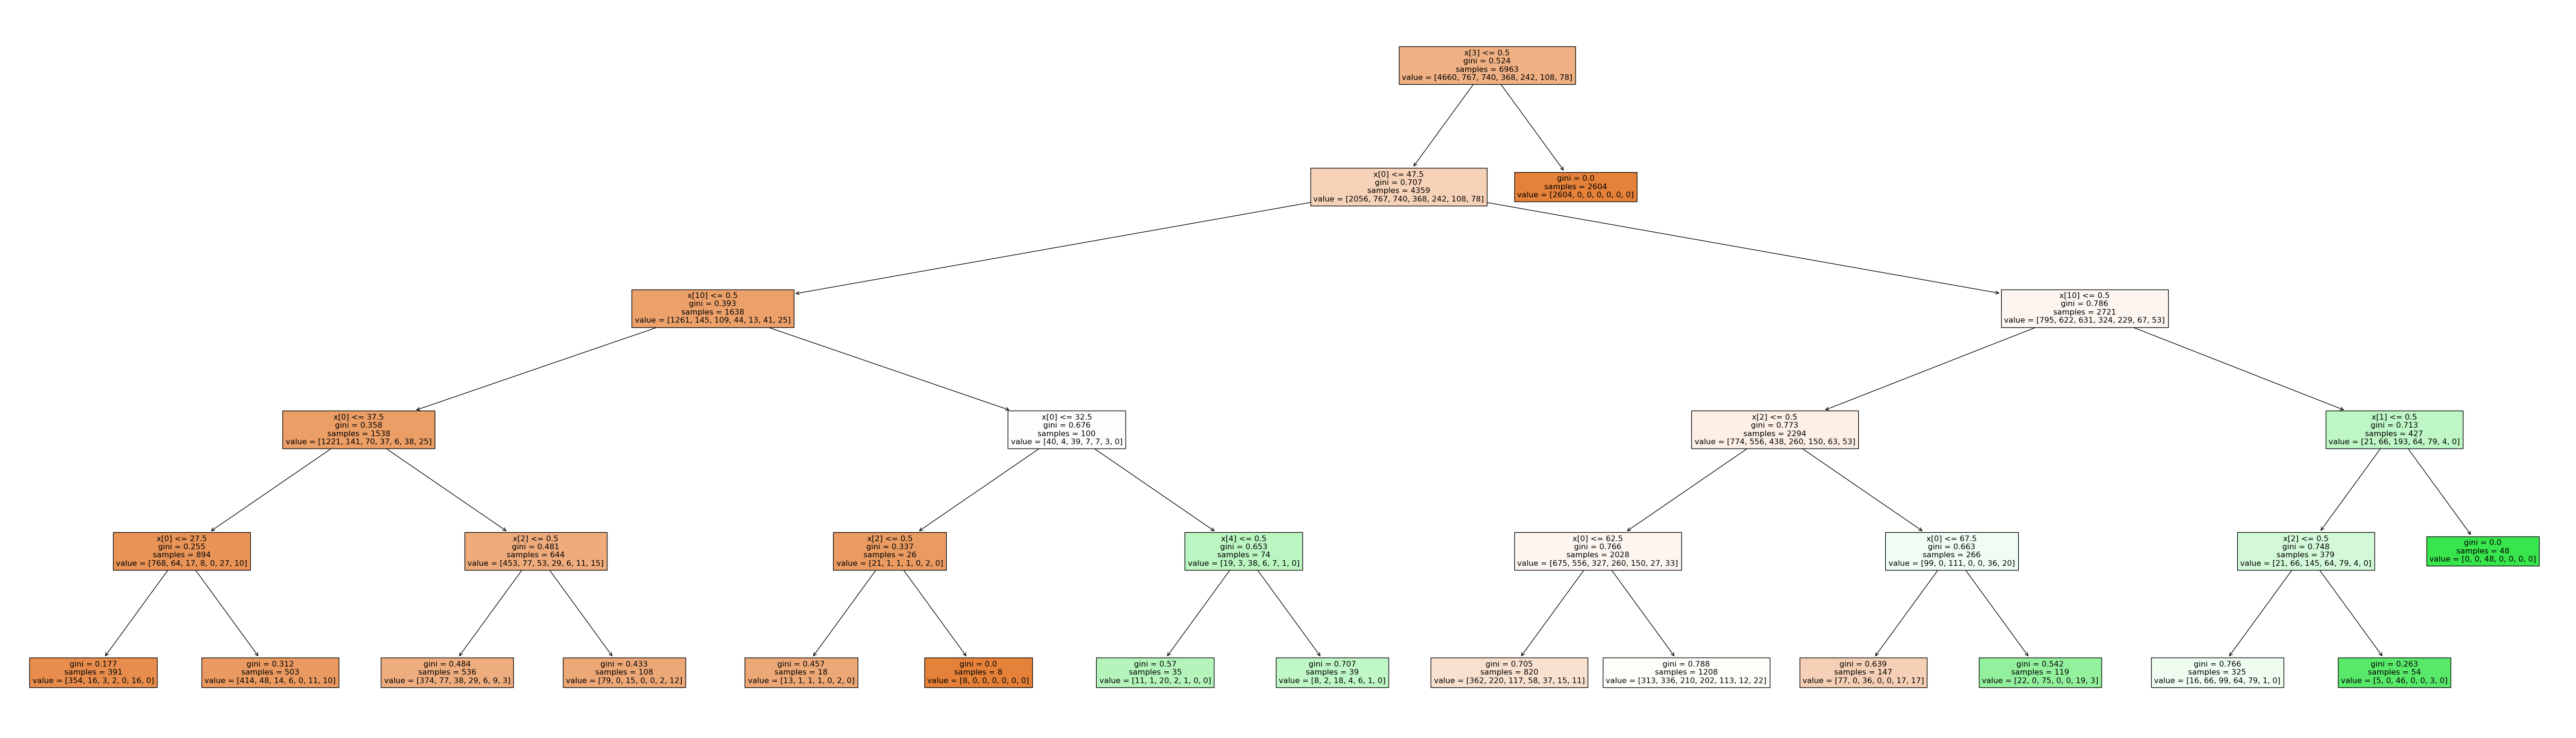

In [51]:
plt.figure(figsize=(70,20))
tree.plot_tree(model3, filled=True)
plt.show()

In [52]:
model4 = DecisionTreeClassifier(criterion="entropy", random_state=42)
model4.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [53]:
model4.score(x_train, y_train)

0.7637512566422519

In [54]:
y_pred3 = model4.predict(x_test)
accuracy_score(y_test, y_pred3)

0.7236180904522613

In [55]:
print(confusion_matrix(y_test, y_pred3))

[[1865   74   34   10    3    3    1]
 [ 186   96   44   14    4    0    0]
 [  93   57  156   26   10    6    1]
 [  55   27   37   23    4    0    0]
 [  27   15   24   14    5    0    0]
 [  10    3   17    0    0    4    0]
 [  18    1    3    2    0    2   11]]


In [56]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           1       0.83      0.94      0.88      1990
           2       0.35      0.28      0.31       344
           3       0.50      0.45      0.47       349
           4       0.26      0.16      0.20       146
           5       0.19      0.06      0.09        85
           6       0.27      0.12      0.16        34
           7       0.85      0.30      0.44        37

    accuracy                           0.72      2985
   macro avg       0.46      0.33      0.36      2985
weighted avg       0.68      0.72      0.70      2985



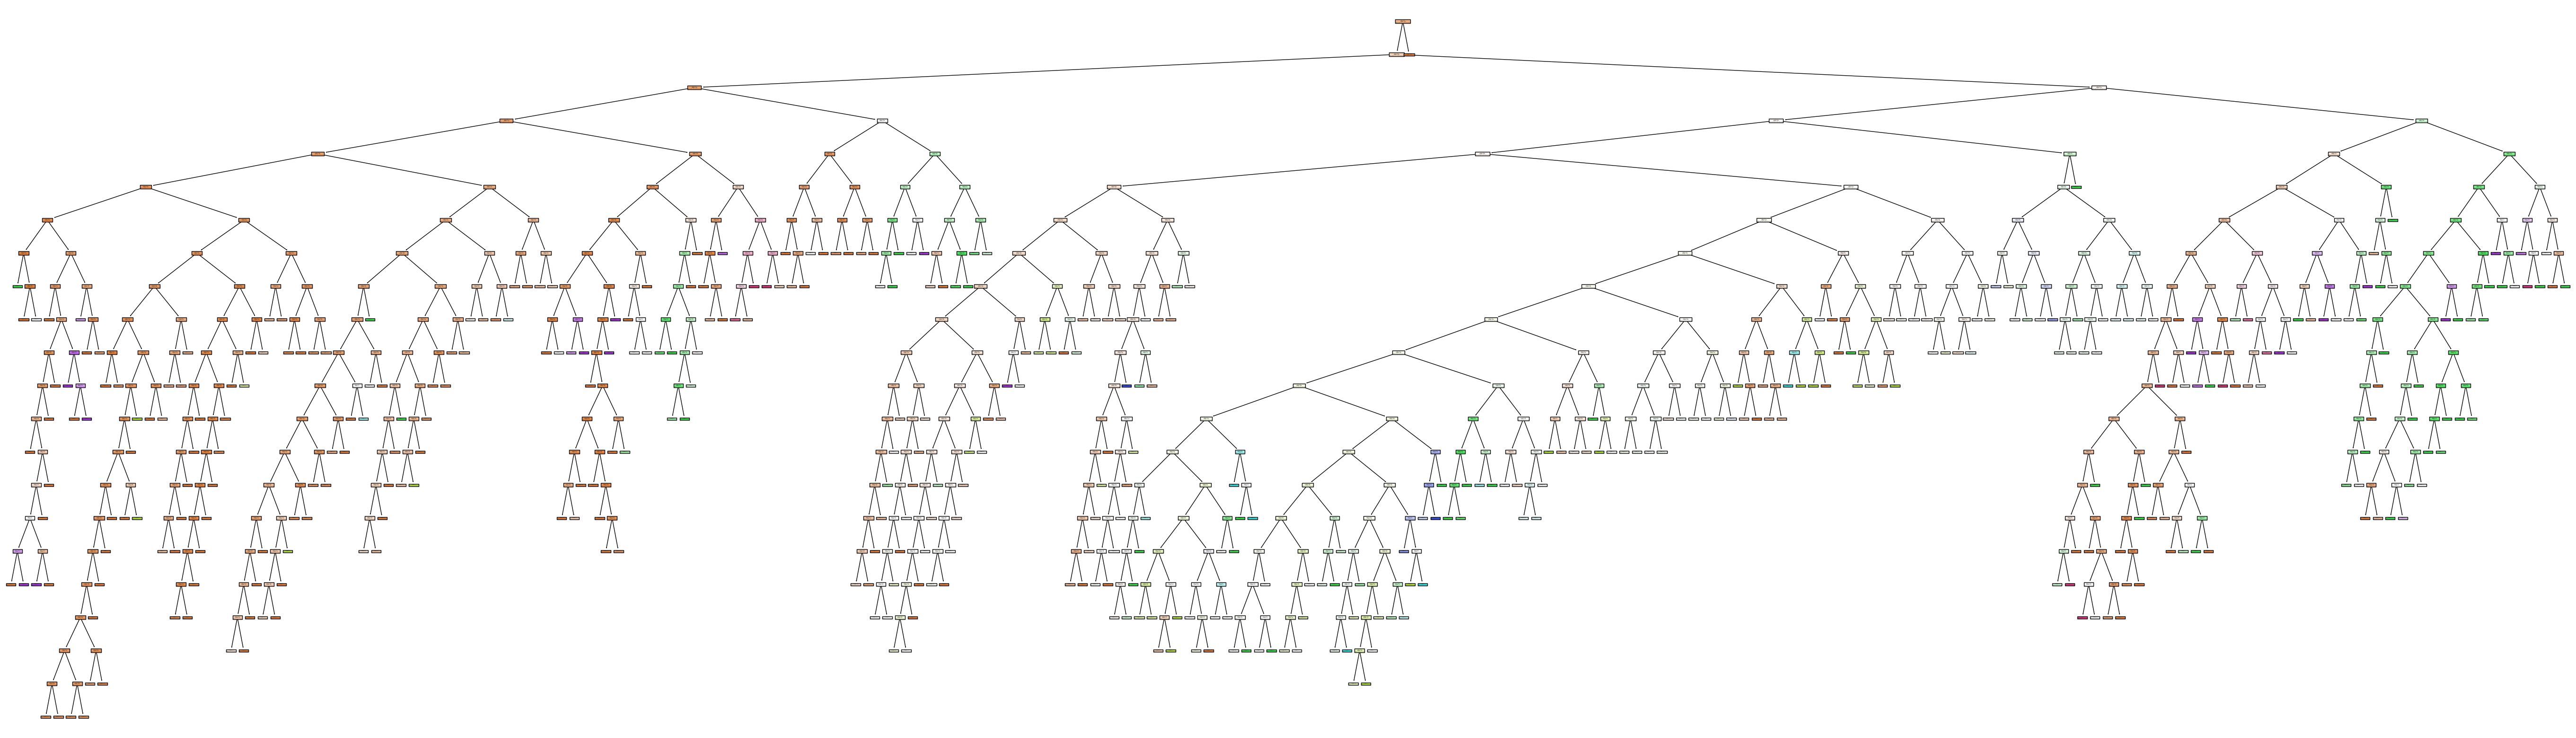

In [57]:
plt.figure(figsize=(70,20))
tree.plot_tree(model4, filled=True)
plt.show()

In [58]:
print(model4.get_depth())

21


In [59]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
model.score(x_train, y_train)

0.7637512566422519

In [61]:
Y_pred = model.predict(x_test)
accuracy_score(y_test, Y_pred)

0.7209380234505862

In [62]:
print(confusion_matrix(y_test, Y_pred))

[[1859   69   39   14    7    1    1]
 [ 181   87   42   28    6    0    0]
 [  83   57  142   39   21    6    1]
 [  52   24   29   36    5    0    0]
 [  25   15   19   17    9    0    0]
 [  10    3   13    1    1    6    0]
 [  19    1    2    2    0    0   13]]


In [63]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.83      0.93      0.88      1990
           2       0.34      0.25      0.29       344
           3       0.50      0.41      0.45       349
           4       0.26      0.25      0.25       146
           5       0.18      0.11      0.13        85
           6       0.46      0.18      0.26        34
           7       0.87      0.35      0.50        37

    accuracy                           0.72      2985
   macro avg       0.49      0.35      0.39      2985
weighted avg       0.69      0.72      0.70      2985



In [64]:
model0 = RandomForestClassifier(max_depth=13, max_features=None, random_state=42, n_estimators=6000, n_jobs=-1, warm_start=True)
model0.fit(x_train, y_train)

RandomForestClassifier(max_depth=13, max_features=None, n_estimators=6000,
                       n_jobs=-1, random_state=42, warm_start=True)

In [65]:
model0.score(x_train, y_train)

0.7582938388625592

In [66]:
yhat = model0.predict(x_test)
accuracy_score(y_test, yhat)

0.7192629815745394

In [67]:
print(confusion_matrix(y_test, yhat))

[[1874   67   30   10    5    3    1]
 [ 195   98   25   23    3    0    0]
 [  91   80  124   30   16    7    1]
 [  53   38   22   29    4    0    0]
 [  24   20   20   15    6    0    0]
 [  11    4   15    0    0    4    0]
 [  19    2    2    0    0    2   12]]


In [68]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.83      0.94      0.88      1990
           2       0.32      0.28      0.30       344
           3       0.52      0.36      0.42       349
           4       0.27      0.20      0.23       146
           5       0.18      0.07      0.10        85
           6       0.25      0.12      0.16        34
           7       0.86      0.32      0.47        37

    accuracy                           0.72      2985
   macro avg       0.46      0.33      0.37      2985
weighted avg       0.68      0.72      0.69      2985

